In [1]:
from pylab import *

%run ~/pizza/src/pizza.py
%matplotlib inline

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
animate tool did not load:
  No module named ImageTk
image tool did not load:
  No module named Pmw
gl tool did not load:
  No module named OpenGL.Tk


In [2]:
data = dump("dump.lammpstrj")

300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300
read 101 snapshots
101 snapshots selected out of 101
assigned columns: id type x y z v_g c_PPA[1] c_PPA[2] c_PPA[3] 
dump is already unscaled


In [3]:
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [4]:
import seaborn
seaborn.set()

In [5]:
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 16

In [6]:
ppa1 = array(data.vecs(t[-1], "c_PPA[1]"))
ppa2 = array(data.vecs(t[-1], "c_PPA[1]"))
ppa3 = array(data.vecs(t[-1], "c_PPA[1]"))

press = -(ppa1**2 + ppa2**2 + ppa3**2)

x = array(data.vecs(t[-1], "x"))
y = array(data.vecs(t[-1], "y"))
z = array(data.vecs(t[-1], "z"))

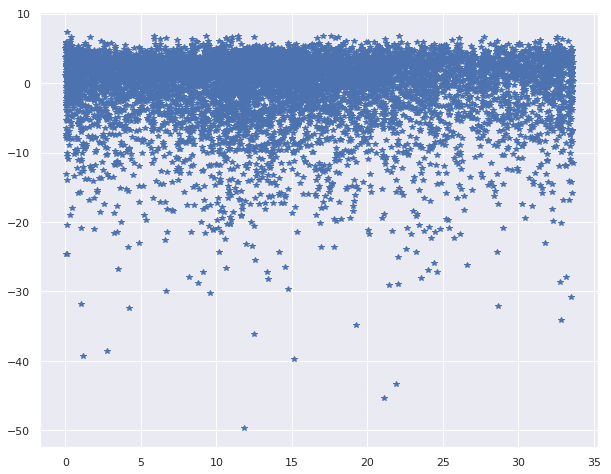

In [7]:
plot(x, ppa1, '*')

In [8]:
from mpl_toolkits.mplot3d import axes3d


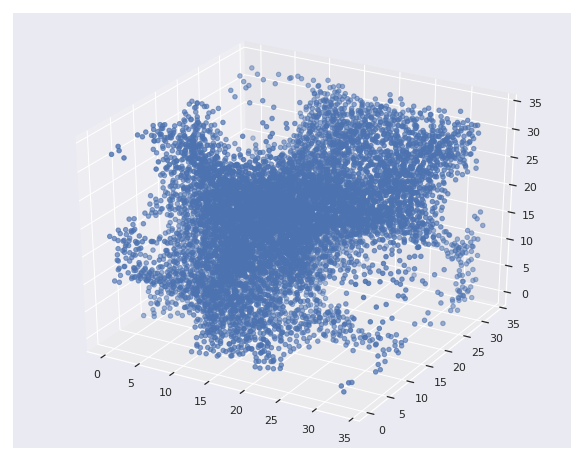

In [9]:
fig = figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx

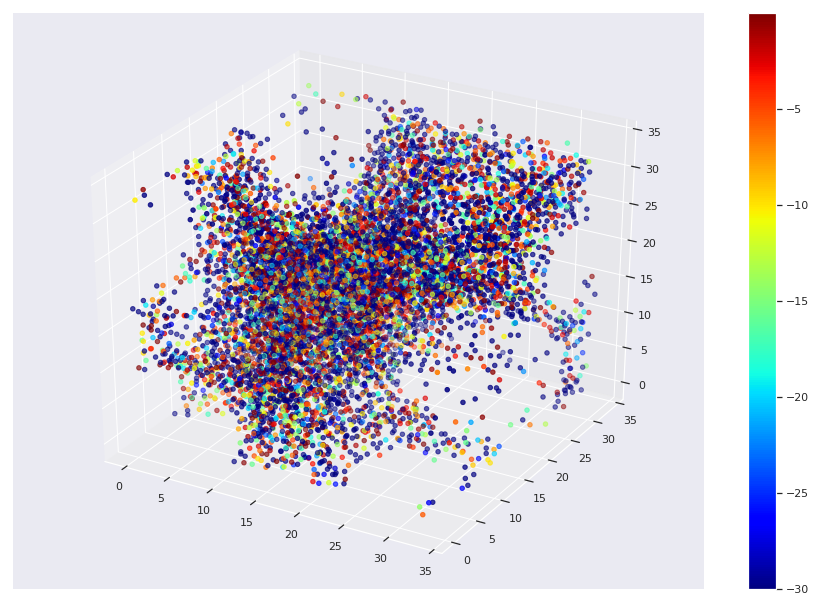

In [11]:
cNorm = matplotlib.colors.Normalize(vmin=-30, vmax=max(press))
cm = get_cmap('jet')
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=scalarMap.to_rgba(press))
scalarMap.set_array(press)
fig.colorbar(scalarMap)
show()

In [15]:
temps = loadtxt("temp.txt")
msd = loadtxt("msd.txt")[4::5, 1]

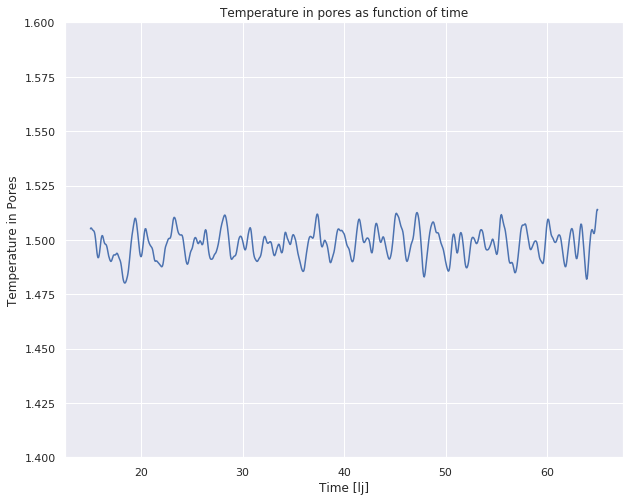

In [13]:
plot(temps[:, 0]*0.05, temps[:, 1], )
ylim(1.40, 1.60)
xlabel("Time [lj]")
ylabel("Temperature in Pores")
title("Temperature in pores as function of time")
show()

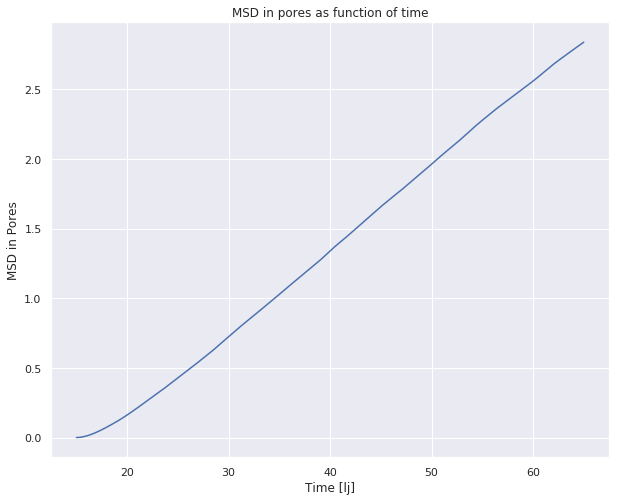

In [21]:
plot(temps[:, 0]*0.05, msd)
xlabel("Time [lj]")
ylabel("MSD in Pores")
title("MSD in pores as function of time")
show()